In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [6]:
#reading the data
data = pd.read_csv('C://Users//hsbc_2019//Desktop//data analytics//Banknote-Authentication-UCI-Dataset-master//Banknote-Authentication-UCI-Dataset-master///bank_notes.csv')
data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
# scaler = MinMaxScale

In [8]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

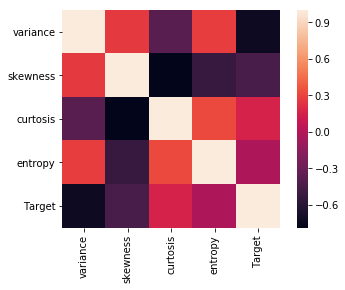

In [9]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, square=True)

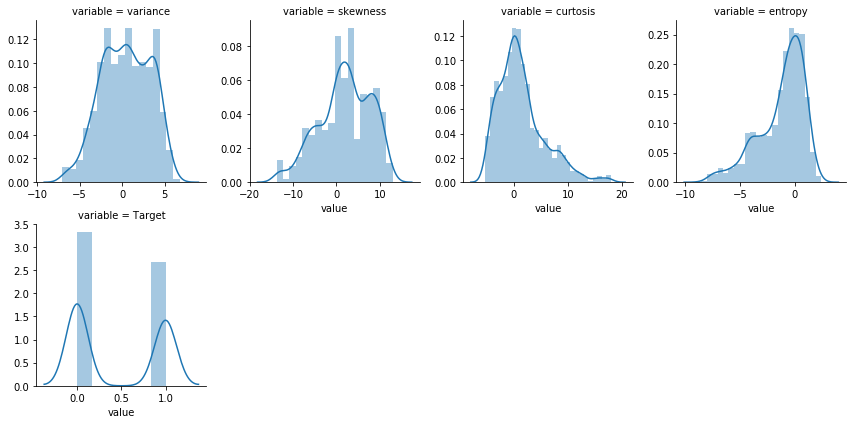

In [10]:
#create numeric plots
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [11]:
#training and test datasets
X = data[["variance","skewness","curtosis","entropy"]]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# KNN Classifier
k = 5
knn = KNeighborsClassifier(n_neighbors = k,metric = "euclidean")
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
Knn_pred = knn.predict(X_test)
accuracy_score(y_test, Knn_pred)

1.0

In [22]:
train_acc=[]
test_acc=[]
k_vals = [3,5,7,9,11]
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(default_train[features],default_train[target])
    train_accuracy_k = model.score(default_train[features],default_train[target])
    test_accuracy_k = model.score(default_test[features],default_test[target])
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)

ValueError: Must pass DataFrame with boolean values only

In [7]:
# SVM Classifer

clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [9]:
# Random Forest Classifier

rndF = RandomForestClassifier(max_depth=5, random_state=0)
rndF.fit(X_train, y_train)

RndF_pred = rndF.predict(X_test)
accuracy_score(y_test, RndF_pred)

0.9781818181818182